In [1]:
import pymc3 as pm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import theano.tensor as tt

%matplotlib inline

In [2]:
data = pd.read_csv('datasets/antiseptic-amputation.csv', header=None)
data.columns = ['subject', 'year', 'antiseptic', 'limb', 'outcome']
data.set_index('subject', inplace=True)

# Data normalization
data['year'] = data['year'] - data['year'].min()
data.head()

,year,antiseptic,limb,outcome
subject,,,,
1,0,0,1,0
2,0,0,1,1
3,0,0,1,0
4,0,0,1,0
5,0,0,1,1


The logistic function is defined as

$$ p = \frac{1}{1 + e^{-k}}$$

Here, the $k$ term refers to:

$$ k = \beta_{n}x_{1} + \beta_{2}x_{2} + ... + \beta_{n}x_{n} $$

Therefore, we will write it in as such

In [14]:
with pm.Model() as model:   
    betas = pm.Normal('betas', mu=0, sd=100**2, shape=(3,1))
    # betas = pm.Normal('betas', mu=0, sd=100**2)
    x = betas[0] * data['year'] + betas[1] * data['antiseptic'] + betas[2] * data['limb']
    # x = data['antiseptic']
    
    prob = 1 / (1 + np.exp(-x))
    prob_like = pm.Bernoulli('likelihood', p=prob, observed=data['outcome'])

In [15]:
with model:
    trace = pm.sample(draws=2000)

Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average ELBO = -73.421: 100%|██████████| 200000/200000 [00:11<00:00, 17966.90it/s]
Finished [100%]: Average ELBO = -73.41
100%|██████████| 2000/2000 [00:05<00:00, 674.76it/s]


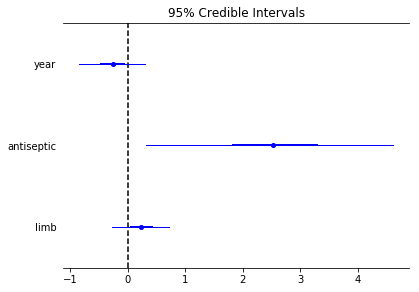

In [16]:
pm.forestplot(trace, ylabels=['year', 'antiseptic', 'limb'])

The use of antiseptics, as we can see, has the greatest effect on survival.